In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# from sklearn.preprocessing import LabelEncoder


In [2]:
# specify the file_path
file_path = "./Credit_card_dataset.csv"
# read the csv file
df = pd.read_csv(file_path)
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [4]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [6]:
# There is a missing value in the  credit limit column
df = df.fillna(df["CREDIT_LIMIT"].mean(numeric_only=True))
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# # Encoding the customer Id
# label_encoder = LabelEncoder()
# df["CUST_ID"] = label_encoder.fit_transform(df["CUST_ID"])
# df["CUST_ID"]

In [8]:
# no duplicate values
# Handling outliers
lower_limit = df.quantile(0.25, numeric_only=True)
upper_limit = df.quantile(0.75, numeric_only=True)
Inter_quantile_range = upper_limit - lower_limit

lower_bound = lower_limit - 1.5 * Inter_quantile_range
upper_bound = upper_limit + 1.5 * Inter_quantile_range
f_filtered, lower_bound = df.align(lower_bound, axis=1, copy=False)
df_filtered, upper_bound = df.align(upper_bound, axis=1, copy=False)

# Remove outliers
df_cleaned = df_filtered[~((df_filtered < lower_bound) | (df_filtered > upper_bound)).any(axis=1)]
df_cleaned

,BALANCE_FREQUENCY,CASH_ADVANCE,CREDIT_LIMIT,CUST_ID,PAYMENTS,PURCHASES
0,0.818182,0.000000,1000.0,C10001,201.802084,95.40
2,1.000000,0.000000,7500.0,C10003,622.066742,773.17
4,1.000000,0.000000,1200.0,C10005,678.334763,16.00
5,1.000000,0.000000,1800.0,C10006,1400.057770,1333.28
7,1.000000,0.000000,2300.0,C10008,679.065082,436.20
...,...,...,...,...,...,...
8944,0.833333,0.000000,4000.0,C19185,0.000000,1012.73
8945,1.000000,0.000000,1000.0,C19186,325.594462,291.12
8946,1.000000,0.000000,1000.0,C19187,275.861322,300.00
8947,0.833333,0.000000,1000.0,C19188,81.270775,144.40


In [9]:
# hierachial clustering
# selecting 2 features for clustering
features = df[['PURCHASES', 'CREDIT_LIMIT']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


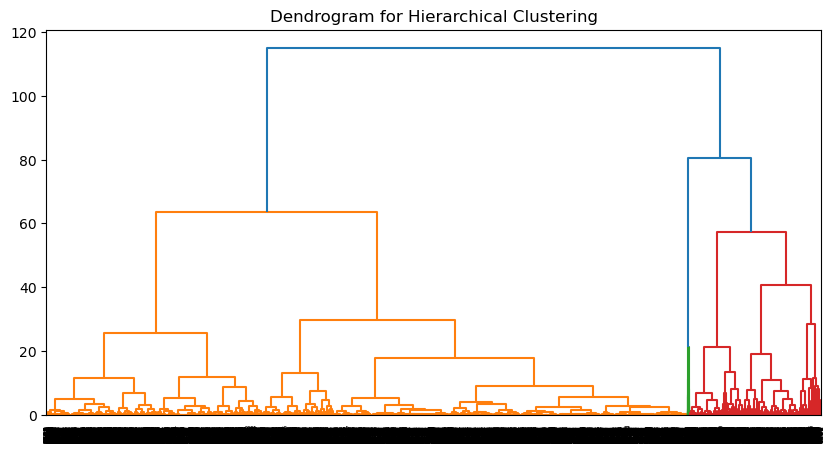

In [10]:
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [13]:
# Kmeans clustering
sumSquared_error = []
k_range = range(2,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k , random_state=42)
    kmeans.fit(scaled_features)
    sumSquared_error.append(kmeans.inertia_)

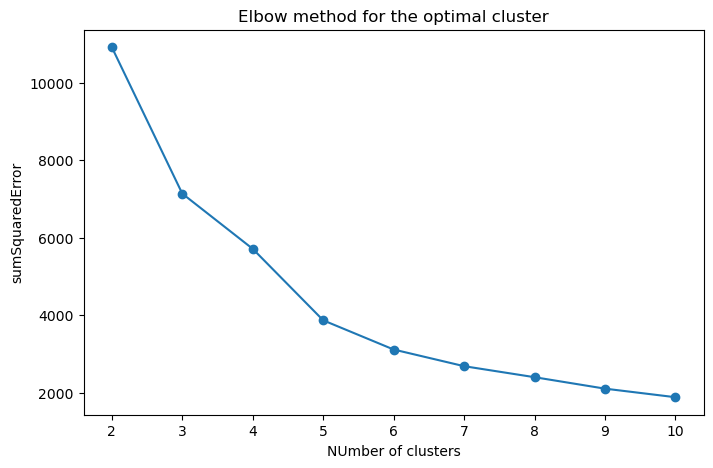

In [15]:
# Plotting the elbow curve for visualization
# to find the optimal cluster
plt.figure(figsize=(8,5))
plt.plot(k_range,sumSquared_error,marker='o')
plt.xlabel('NUmber of clusters')
plt.ylabel('sumSquaredError')
plt.title('Elbow method for the optimal cluster')
plt.show()

In [27]:
# 6 seems like the optimal k-point
optimal_K = 6
kmeans = KMeans(n_clusters=optimal_K, random_state= 42)
kmeans_labels = kmeans.fit_predict(scaled_features)

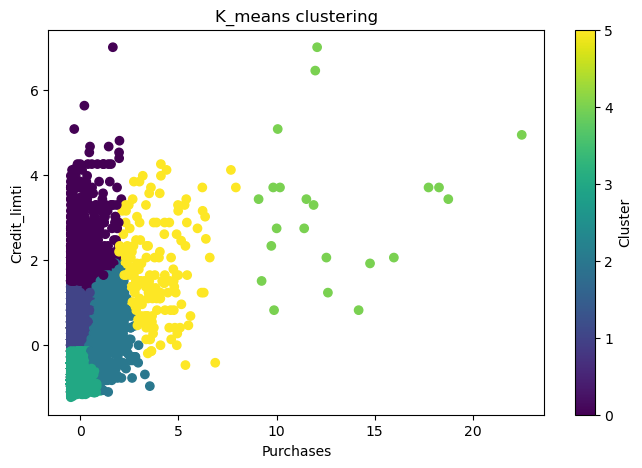

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_features[:,0],scaled_features[:,1],c = kmeans_labels,cmap='viridis')
plt.xlabel('Purchases')
plt.ylabel('Credit_limti')
plt.title('K_means clustering')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
# Interpreting the results
# Silhouette Score
temp_score = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for K={optimal_K}: {temp_score}")

Silhouette Score for K=6: 0.5221604260867346


In [ ]:
# The highest silhouette score indicates the best optimal point to be 6 
# Due to the tightly packed clusters in the scatterplot it suggests well separated groups
# Silhouette Score close to 1 means well-defined clusters